In [1]:
import pandas as pd
import glob
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dropbox_dir = "/Users/kendraziegler/Dropbox (Palmer Lab)"

#dropbox_dir = "C:/Users/cocoy/Dropbox (Palmer Lab)"
meta_dir = dropbox_dir + "/Suzanne_Mitchell_U01/Data-locomotor"


In [3]:
#Creating one dataframe with all locomotor files
#Must manually unzip all folders
#Must combine locomotor 5 files from T1&T2 and T3&T4 into one file named comprehensive_output_files
#Will not be doing analysis on C06 or C07
cohorts_dir = ['Shipment1_locomotor',
               'Shipment2_locomotor',
               'Shipment3_locomotor',
               'Shipment4_locomotor',
               'Shipment5_locomotor']
               #'Shipment6_locomotor']
               #'ShipR_locomotor']

zip_folder = ['U01_Shipment1_Locomotor/comprehensive-output-files/',
              'U01_Shipment2_Locomotor/S2-comprehensive-output-files/',
              'U01-Shipment3_Locomotor/S3-comprehensive-out-files/',
              'comprehensive_output_files/comprehensive_output_files/',
              'comprehensive-output-files/']
              #'Ship6-comprehensive-output-files/S6-comprehensive-out-files/']
              #'R-comprehensive-output-files/R-comprehensive-output-files/']
dir_dict = {cohorts_dir[i]: zip_folder[i] for i in range(len(cohorts_dir))}
count = 0
df_excel = pd.DataFrame()
df_csv = pd.DataFrame()
for cohort_dir,zip_folder in dir_dict.items():
        #for cohort in cohort_list:
        raw_dir = meta_dir + "/" + cohort_dir + "/" + zip_folder
        os.chdir(raw_dir)
        for file in os.listdir(raw_dir):
            if file.endswith('.xlsx'):
                df_excel = df_excel.append(pd.read_excel(file), ignore_index=True)
            elif file.endswith('.csv'):
                count += 1
                #print(file)
                df_csv = df_csv.append(pd.read_csv(file, skiprows = 58), ignore_index=True)

                
df_csv
#print(count)

,EXPERIMENT,CAGE,SUBJECT ID,SUBJECT TYPE,SUBJECT SEX,SUBJECT AGE,SUBJECT TREATMENT,BATCH,PHASE,SAMPLE,...,AMBULATORY EPISODE MEDIAN VELOCITY (cm/s),LEFT-FRONT TIME LEGACY (s),RIGHT-FRONT TIME LEGACY (s),LEFT-REAR TIME LEGACY (s),RIGHT-REAR TIME LEGACY (s),MARGIN TIME LEGACY (s),CENTER TIME LEGACY (s),MARGIN DISTANCE LEGACY (cm),CENTER DISTANCE LEGACY (cm),Unnamed: 44
0,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,1,...,14.31,1.00,1.88,0.00,1.06,35.51,24.49,100.72,131.26,NaN
1,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,2,...,19.68,0.00,0.00,0.00,6.47,47.35,12.65,152.35,103.79,NaN
2,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,3,...,16.80,0.75,0.00,0.00,0.33,35.38,24.62,127.90,204.45,NaN
3,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,4,...,16.07,0.00,0.00,0.00,7.55,40.35,19.66,61.70,114.53,NaN
4,U01-t1-gp5,Cage 1,46179,9-black,Unknown,11,NaN,Batch 1,Phase 1,5,...,10.51,0.00,0.28,0.00,1.81,38.65,21.35,76.74,153.27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18010,U01-t2-gp17,Cage 4,87192,34-white,Unknown,12,NaN,Batch 1,test,11,...,31.84,0.55,2.80,2.02,1.80,51.05,8.95,250.67,93.91,NaN
18011,U01-t2-gp17,Cage 4,87192,34-white,Unknown,12,NaN,Batch 1,test,12,...,7.28,0.36,20.27,0.00,3.11,52.67,7.33,160.38,29.49,NaN
18012,U01-t2-gp17,Cage 4,87192,34-white,Unknown,12,NaN,Batch 1,test,13,...,8.64,0.00,19.81,4.52,0.00,57.52,2.48,40.88,40.21,NaN
18013,U01-t2-gp17,Cage 4,87192,34-white,Unknown,12,NaN,Batch 1,test,14,...,26.24,3.45,8.36,1.11,1.67,57.81,2.19,229.95,73.22,NaN


In [4]:
print(list(df_csv.columns))

['EXPERIMENT', 'CAGE', 'SUBJECT ID', 'SUBJECT TYPE', 'SUBJECT SEX', 'SUBJECT AGE', 'SUBJECT TREATMENT', 'BATCH', 'PHASE', 'SAMPLE', 'START TIME', 'DURATION (s)', 'TOTAL DISTANCE (cm)', 'TOTAL DISTANCE X-AXIS (cm)', 'TOTAL DISTANCE Y-AXIS (cm)', 'HORIZONTAL ACTIVITY COUNT', 'AMBULATORY ACTIVITY COUNT', 'REST TIME (s)', 'REST EPISODE COUNT', 'MOVEMENT TIME (s)', 'MOVEMENT EPISODE COUNT', 'AMBULATORY TIME (s)', 'AMBULATORY EPISODE COUNT', 'STEREOTYPY TIME (s)', 'STEREOTYPIC EPISODE COUNT', 'STEREOTYPIC ACTIVITY COUNT', 'STEREOTYPIC EPISODE ACTIVITY COUNT', 'VERTICAL EPISODE COUNT', 'VERTICAL ACTIVITY COUNT', 'VERTICAL ACTIVITY TIME (s)', 'JUMP COUNT', 'CLOCKWISE REVOLUTIONS', 'COUNTER-CLOCKWISE REVOLUTIONS', 'AMBULATORY EPISODE AVERAGE VELOCITY (cm/s)', 'AMBULATORY EPISODE PEAK AVERAGE VELOCITY (cm/s)', 'AMBULATORY EPISODE MEDIAN VELOCITY (cm/s)', 'LEFT-FRONT TIME LEGACY (s)', 'RIGHT-FRONT TIME LEGACY (s)', 'LEFT-REAR TIME LEGACY (s)', 'RIGHT-REAR TIME LEGACY (s)', 'MARGIN TIME LEGACY (s)

In [5]:
def format_df_csv():
    #make column headers uniform
    df_csv.columns = df_csv.columns.str.replace(':','')
    df_csv.columns = df_csv.columns.str.replace(' ','_')
    df_csv.columns = df_csv.columns.str.lower()
    
    df_csv.rename(columns={'subject_id':'rfid','duration_(s)':'duration','total_distance_(cm)':'total_distance',
                           'total_distance_x-axis_(cm)':'total_distance_x','total_distance_y-axis_(cm)':
                           'total_distance_y','rest_time_(s)':'rest_time','movement_time_(s)':'movement_time',
                           'ambulatory_time_(s)':'ambulatory_time','stereotypy_time_(s)':'stereotypy_time',
                           'vertical_activity_time_(s)':'vertical_activity_time','ambulatory_episode_average_velocity_(cm/s)':
                           'ambulatory_episode_average_velocity','ambulatory_episode_peak_average_velocity_(cm/s)':
                           'ambulatory_episode_peak_average_velocity','ambulatory_episode_median_velocity_(cm/s)':
                           'ambulatory_episode_median_velocity','left-front_time_legacy_(s)':'left-front_time_legacy',
                           'right-front_time_legacy_(s)':'right_front_time_legacy','counter-clockwise_revolutions':
                           'counter_clockwise_revolutions','left-rear_time_legacy_(s)':'left_rear_time_legacy',
                           'right-rear_time_legacy_(s)':'right_rear_time_legacy','margin_time_legacy_(s)':
                           'margin_time_legacy','center_time_legacy_(s)':'center_time_legacy','margin_distance_legacy_(cm)':
                           'margin_distance_legacy','center_distance_legacy_(cm)':'center_distance_legacy'},inplace = True)
    
    #Remove uneccesary columns
    #Below: column header(only value contained in column)
    #subject_sex(unknown), subject_treatment(NaN),unnamed_44(NaN),batch(batch 1), duration(60)
    df_csv.drop(['subject_sex', 'subject_treatment','unnamed_44','batch','duration'], axis=1, inplace = True)
    

        
        

format_df_csv()
df_csv

,experiment,cage,rfid,subject_type,subject_age,phase,sample,start_time,total_distance,total_distance_x,...,ambulatory_episode_peak_average_velocity,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy
0,U01-t1-gp5,Cage 1,46179,9-black,11,Phase 1,1,2:04:08 PM,231.98,75.88,...,28.33,14.31,1.00,1.88,0.00,1.06,35.51,24.49,100.72,131.26
1,U01-t1-gp5,Cage 1,46179,9-black,11,Phase 1,2,2:05:08 PM,256.13,70.17,...,18.69,19.68,0.00,0.00,0.00,6.47,47.35,12.65,152.35,103.79
2,U01-t1-gp5,Cage 1,46179,9-black,11,Phase 1,3,2:06:08 PM,332.35,157.80,...,19.75,16.80,0.75,0.00,0.00,0.33,35.38,24.62,127.90,204.45
3,U01-t1-gp5,Cage 1,46179,9-black,11,Phase 1,4,2:07:08 PM,176.24,79.38,...,36.77,16.07,0.00,0.00,0.00,7.55,40.35,19.66,61.70,114.53
4,U01-t1-gp5,Cage 1,46179,9-black,11,Phase 1,5,2:08:08 PM,230.01,115.25,...,17.83,10.51,0.00,0.28,0.00,1.81,38.65,21.35,76.74,153.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18010,U01-t2-gp17,Cage 4,87192,34-white,12,test,11,2:29:19 PM,344.59,163.83,...,29.67,31.84,0.55,2.80,2.02,1.80,51.05,8.95,250.67,93.91
18011,U01-t2-gp17,Cage 4,87192,34-white,12,test,12,2:30:19 PM,189.87,55.25,...,19.64,7.28,0.36,20.27,0.00,3.11,52.67,7.33,160.38,29.49
18012,U01-t2-gp17,Cage 4,87192,34-white,12,test,13,2:31:19 PM,81.09,34.93,...,32.90,8.64,0.00,19.81,4.52,0.00,57.52,2.48,40.88,40.21
18013,U01-t2-gp17,Cage 4,87192,34-white,12,test,14,2:32:19 PM,303.16,104.78,...,31.50,26.24,3.45,8.36,1.11,1.67,57.81,2.19,229.95,73.22


In [6]:
#Load in master sheet in order to get the cohort value
#dropbox_dir = r'C:/Users/cocoy/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
dropbox_dir = r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
#creat last_5 column in order to compare with locomotor files
df_wfu = pd.read_csv(dropbox_dir + '/wfu_master.csv')
df_wfu['rfid'] = df_wfu['rfid'].astype(str)
df_wfu['last_5'] = df_wfu['rfid'].str.replace('9330003200','')
df_wfu['last_5'] = df_wfu['last_5'].str.replace('9330003201','')
df_wfu

,cohort,sires,dames,labanimalid,accessid,sex,rfid,dob,dow,shipmentdate,...,coatcolor,earpunch,rack,shipmentbox,housingbox,shipmentage,weanage,comments,resolution,last_5
0,C01,72539_1,72595_5,TJ008,73472_2,F,933000320045906,2018-09-24,2018-10-15,2018-10-30,...,BROWNHOOD,RB,D-F4,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45906
1,C01,73358_1,73360_1,TJ027,73477_2,F,933000320045890,2018-09-25,2018-10-16,2018-10-30,...,BROWNHOOD,LM,D-G8,4.0,32.0,35.0,21.0,NaN,NaN,45890
2,C01,72539_1,72595_5,TJ003,73472_8,M,933000320045902,2018-09-24,2018-10-15,2018-10-30,...,ALBINO,RT,D-F2,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45902
3,C01,72794_1,72775_4,TJ020,73475_4,F,933000320045904,2018-09-25,2018-10-16,2018-10-30,...,BROWN,RB,D-G2,2.0,9999.0,35.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45904
4,C01,72624_1,72596_4,TJ002,73471_5,F,933000320045908,2018-09-23,2018-10-15,2018-10-30,...,BLACK,LT,D-F2,2.0,9999.0,37.0,22.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,C07,933000320048190,933000320187377,NaN,NaN,F,933000320125436,2020-08-09,2020-09-04,NaN,...,BLACK,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25436
897,C07,933000320187153,933000320187383,NaN,NaN,F,933000320125437,2020-08-09,2020-09-04,NaN,...,BROWNHOOD,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25437
898,C07,933000320187217,933000320048245,NaN,NaN,F,933000320125440,2020-08-09,2020-09-04,NaN,...,BROWN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25440
899,C07,933000320187249,933000320048234,NaN,NaN,M,933000320125443,2020-08-08,2020-09-04,NaN,...,BLACKHOOD,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,25443


In [7]:
#All error corrections


#87713 is in C05 but cannot be found in wfu_master
#87713 is a typo and should be 87173
#missing_cohort = locomotor_all[locomotor_all['cohort'].isna()]
#locomotor_all[locomotor_all['rfid'] == '933000320187173']
def fix_rfid(df):
    df['rfid'] = df['rfid'].astype(str)
    df.loc[(df.rfid == '87713'),'rfid'] = '87173'

#need to remove 933000320046763 from file U01-t2-gp13; rat had tail injury in first file
#file U01-t2-gp13-B contains the correct data for rat
#will remove 15 rows from table
def remove_incorrect(df):
    df.drop(df.loc[(df.experiment == 'U01-t2-gp13') & (df.rfid == '46763')].index, inplace = True)
    df.loc[(df.experiment == 'U01-t2-gp13-B'),'experiment'] = 'U01-t2-gp13'
    
#There is no U01-t1-gp2 in C05. Assume U01-t1-gp2a is its replacement
def file_rename(df):
    df.loc[(df.experiment == 'U01-t1-gp2a'),'experiment'] = 'U01-t1-gp2'
    #extra_file = locomotor_all[locomotor_all['experiment'] == 'U01-t1-gp2a']
    
remove_incorrect(df_csv)
fix_rfid(df_csv)
file_rename(df_csv)


In [8]:
def splitting_cells(df):
    df['cage'] = df['cage'].str.replace('Cage ','')
    #df['phase'] = df['phase'].str.replace('Phase ','')
    #split cell based on -
    df['U01'] = df.experiment.str.split('-', expand = True)[0]
    df['time'] = df.experiment.str.split('-', expand = True)[1]
    df['file_num'] = df.experiment.str.split('-', expand = True)[2]

splitting_cells(df_csv)
list(df_csv.columns.values)

['experiment',
 'cage',
 'rfid',
 'subject_type',
 'subject_age',
 'phase',
 'sample',
 'start_time',
 'total_distance',
 'total_distance_x',
 'total_distance_y',
 'horizontal_activity_count',
 'ambulatory_activity_count',
 'rest_time',
 'rest_episode_count',
 'movement_time',
 'movement_episode_count',
 'ambulatory_time',
 'ambulatory_episode_count',
 'stereotypy_time',
 'stereotypic_episode_count',
 'stereotypic_activity_count',
 'stereotypic_episode_activity_count',
 'vertical_episode_count',
 'vertical_activity_count',
 'vertical_activity_time',
 'jump_count',
 'clockwise_revolutions',
 'counter_clockwise_revolutions',
 'ambulatory_episode_average_velocity',
 'ambulatory_episode_peak_average_velocity',
 'ambulatory_episode_median_velocity',
 'left-front_time_legacy',
 'right_front_time_legacy',
 'left_rear_time_legacy',
 'right_rear_time_legacy',
 'margin_time_legacy',
 'center_time_legacy',
 'margin_distance_legacy',
 'center_distance_legacy',
 'U01',
 'time',
 'file_num']

In [9]:
def format_for_calc(df_csv):
    #drop uneeded columns for calc
    df = df_csv.drop(['U01','subject_type','subject_age','phase','start_time'], axis=1)
    #reorganize columns
    df = df[['experiment', 'rfid', 'time',
       'file_num', 'sample','cage', 'total_distance', 'total_distance_x',
       'total_distance_y', 'horizontal_activity_count',
       'ambulatory_activity_count', 'rest_time', 'rest_episode_count',
       'movement_time', 'movement_episode_count', 'ambulatory_time',
       'ambulatory_episode_count', 'stereotypy_time',
       'stereotypic_episode_count', 'stereotypic_activity_count',
       'stereotypic_episode_activity_count', 'vertical_episode_count',
       'vertical_activity_count', 'vertical_activity_time', 'jump_count',
       'clockwise_revolutions', 'counter_clockwise_revolutions',
       'ambulatory_episode_average_velocity',
       'ambulatory_episode_peak_average_velocity',
       'ambulatory_episode_median_velocity', 'left-front_time_legacy',
       'right_front_time_legacy', 'left_rear_time_legacy',
       'right_rear_time_legacy', 'margin_time_legacy', 'center_time_legacy',
       'margin_distance_legacy', 'center_distance_legacy']]
    #Drop rows that will not be used for calculations: C07, C06, t3, t4 according to Mitchell
    #some C07 file was messing with upload so whole cohort has been removed from upload
    #df.drop(df.loc[df['cohort']=='C07'].index, inplace=True)
    #df.drop(df.loc[df['cohort']=='C06'].index, inplace=True)
    df.drop(df.loc[df['time']=='t3'].index, inplace=True)
    df.drop(df.loc[df['time']=='t4'].index, inplace=True)

    return df


locomotor = format_for_calc(df_csv)

In [10]:
locomotor

,experiment,rfid,time,file_num,sample,cage,total_distance,total_distance_x,total_distance_y,horizontal_activity_count,...,ambulatory_episode_peak_average_velocity,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy
0,U01-t1-gp5,46179,t1,gp5,1,1,231.98,75.88,80.33,570,...,28.33,14.31,1.00,1.88,0.00,1.06,35.51,24.49,100.72,131.26
1,U01-t1-gp5,46179,t1,gp5,2,1,256.13,70.17,107.95,517,...,18.69,19.68,0.00,0.00,0.00,6.47,47.35,12.65,152.35,103.79
2,U01-t1-gp5,46179,t1,gp5,3,1,332.35,157.80,113.67,596,...,19.75,16.80,0.75,0.00,0.00,0.33,35.38,24.62,127.90,204.45
3,U01-t1-gp5,46179,t1,gp5,4,1,176.24,79.38,44.77,324,...,36.77,16.07,0.00,0.00,0.00,7.55,40.35,19.66,61.70,114.53
4,U01-t1-gp5,46179,t1,gp5,5,1,230.01,115.25,71.76,451,...,17.83,10.51,0.00,0.28,0.00,1.81,38.65,21.35,76.74,153.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18010,U01-t2-gp17,87192,t2,gp17,11,4,344.59,163.83,115.57,570,...,29.67,31.84,0.55,2.80,2.02,1.80,51.05,8.95,250.67,93.91
18011,U01-t2-gp17,87192,t2,gp17,12,4,189.87,55.25,92.08,446,...,19.64,7.28,0.36,20.27,0.00,3.11,52.67,7.33,160.38,29.49
18012,U01-t2-gp17,87192,t2,gp17,13,4,81.09,34.93,20.00,221,...,32.90,8.64,0.00,19.81,4.52,0.00,57.52,2.48,40.88,40.21
18013,U01-t2-gp17,87192,t2,gp17,14,4,303.16,104.78,133.03,530,...,31.50,26.24,3.45,8.36,1.11,1.67,57.81,2.19,229.95,73.22


In [11]:
def drop_unwanted(locomotor):
    locomotor = locomotor.drop(labels=[ 'total_distance_x',
 'total_distance_y',
 'horizontal_activity_count',
 'ambulatory_activity_count',
 'movement_time',
 'ambulatory_time',
 'ambulatory_episode_count',
 'stereotypy_time',
 'stereotypic_episode_count',
 'stereotypic_activity_count',
 'stereotypic_episode_activity_count',
 'vertical_episode_count',
 'vertical_activity_time',
 'jump_count',
 'clockwise_revolutions',
 'counter_clockwise_revolutions',
 'ambulatory_episode_average_velocity',
 'ambulatory_episode_peak_average_velocity',
 'ambulatory_episode_median_velocity',
 'left-front_time_legacy',
 'right_front_time_legacy',
 'left_rear_time_legacy',
 'right_rear_time_legacy',
 'margin_time_legacy',
 'margin_distance_legacy',
 'center_distance_legacy'], axis=1)
    return locomotor
    
locomotor = drop_unwanted(locomotor)
list(locomotor.columns.values)

['experiment',
 'rfid',
 'time',
 'file_num',
 'sample',
 'cage',
 'total_distance',
 'rest_time',
 'rest_episode_count',
 'movement_episode_count',
 'vertical_activity_count',
 'center_time_legacy']

In [12]:
locomotor['rfid'].value_counts()

46059    45
46763    45
46179    30
47708    30
47974    30
         ..
46774    30
45804    30
46027    30
87153    30
46057    15
Name: rfid, Length: 500, dtype: int64

In [13]:
locomotor['experiment'].value_counts()

U01-t2-gp13     315
U01-t1-gp5      300
U01-t1-gp12     300
U01-t1-gp2      300
U01-t1-gp11     300
U01-t2-gp8      300
U01-t1-gp16     300
U01-t1-gp10     300
U01-t1-gp3      300
U01-t2-gp22     300
U01-t2-gp1      300
U01-t1-gp19     300
U01-t1-gp1      300
U01-t2-gp9      300
U01-t2-gp16     300
U01-t2-gp20     300
U01-t2-gp3      300
U01-t1-gp8      300
U01-t2-gp2      300
U01-t2-gp21     300
U01-t1-gp9      300
U01-t1-gp13     300
U01-t2-gp17     300
U01-t2-gp15     300
U01-t2-gp14     300
U01-t1-gp18     300
U01-t2-gp11     300
U01-t2-gp12     300
U01-t1-gp4      300
U01-t2-gp7      300
U01-t1-gp20     300
U01-t1-gp17     300
U01-t2-gp18     300
U01-t2-gp4      300
U01-t2-gp6      300
U01-t1-gp15     300
U01-t2-gp10     300
U01-t1-gp7      300
U01-t1-gp14     300
U01-t2-gp19     300
U01-t2-gp5      300
U01-t1-gp6      300
U01-t1-gp23     270
U01-t2-gp23     270
U01-t2-gp25     240
U01-t1-gp25     240
U01-t1-gp24     240
U01-t2-gp24     240
U01-t1-gp22     240
U01-t1-gp21     240


In [14]:
locomotor['rfid'].value_counts()
#last 4 are from missing c01 file; currently waiting on it from Mitchells team

46059    45
46763    45
46179    30
47708    30
47974    30
         ..
46774    30
45804    30
46027    30
87153    30
46057    15
Name: rfid, Length: 500, dtype: int64

In [15]:
locomotor_t1 = locomotor[locomotor.time == 't1']
locomotor_t1 = locomotor_t1.add_prefix('locomotor_t1_')
locomotor_t1.rename(columns={'locomotor_t1_rfid':'rfid','locomotor_t1_cage':'cage',
                             'locomotor_t1_sample':'sample'},inplace = True)
locomotor_t1
#locomotor_t1['rfid'].value_counts()


,locomotor_t1_experiment,rfid,locomotor_t1_time,locomotor_t1_file_num,sample,cage,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy
0,U01-t1-gp5,46179,t1,gp5,1,1,231.98,5.13,4,5,131,24.49
1,U01-t1-gp5,46179,t1,gp5,2,1,256.13,6.10,5,6,121,12.65
2,U01-t1-gp5,46179,t1,gp5,3,1,332.35,3.64,3,4,141,24.62
3,U01-t1-gp5,46179,t1,gp5,4,1,176.24,15.63,8,9,106,19.66
4,U01-t1-gp5,46179,t1,gp5,5,1,230.01,6.02,3,4,126,21.35
...,...,...,...,...,...,...,...,...,...,...,...,...
17830,U01-t1-gp13,87239,t1,gp13,11,4,1.80,40.98,14,15,76,0.00
17831,U01-t1-gp13,87239,t1,gp13,12,4,21.23,40.58,15,16,80,0.00
17832,U01-t1-gp13,87239,t1,gp13,13,4,108.12,31.86,13,13,85,12.87
17833,U01-t1-gp13,87239,t1,gp13,14,4,338.60,12.22,10,10,98,0.36


In [16]:
locomotor_t2 = locomotor[locomotor.time == 't2']
locomotor_t2 = locomotor_t2.add_prefix('locomotor_t2_')
locomotor_t2.rename(columns={'locomotor_t2_rfid':'rfid','locomotor_t2_cage':'cage',
                             'locomotor_t2_sample':'sample'},inplace = True)
locomotor_t2
locomotor_t2['rfid'].value_counts()


46763    30
46059    30
46073    15
47713    15
47352    15
         ..
46756    15
46569    15
46046    15
46038    15
87192    15
Name: rfid, Length: 499, dtype: int64

In [17]:
locomotor_all = pd.merge(locomotor_t1, locomotor_t2, on=['rfid','sample'],how = 'outer')
locomotor_all

,locomotor_t1_experiment,rfid,locomotor_t1_time,locomotor_t1_file_num,sample,cage_x,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,...,locomotor_t2_experiment,locomotor_t2_time,locomotor_t2_file_num,cage_y,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
0,U01-t1-gp5,46179,t1,gp5,1,1,231.98,5.13,4.0,5.0,...,U01-t2-gp5,t2,gp5,1,197.07,12.09,7.0,8.0,109.0,37.96
1,U01-t1-gp5,46179,t1,gp5,2,1,256.13,6.10,5.0,6.0,...,U01-t2-gp5,t2,gp5,1,220.00,13.81,8.0,9.0,90.0,28.41
2,U01-t1-gp5,46179,t1,gp5,3,1,332.35,3.64,3.0,4.0,...,U01-t2-gp5,t2,gp5,1,139.18,16.31,10.0,11.0,56.0,4.89
3,U01-t1-gp5,46179,t1,gp5,4,1,176.24,15.63,8.0,9.0,...,U01-t2-gp5,t2,gp5,1,0.00,48.72,16.0,17.0,92.0,0.00
4,U01-t1-gp5,46179,t1,gp5,5,1,230.01,6.02,3.0,4.0,...,U01-t2-gp5,t2,gp5,1,187.76,19.39,12.0,12.0,91.0,8.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,NaN,87079,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,...,U01-t2-gp21,t2,gp21,4,375.14,17.31,8.0,7.0,151.0,29.86
7526,NaN,87079,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,U01-t2-gp21,t2,gp21,4,229.07,28.95,15.0,16.0,91.0,16.00
7527,NaN,87079,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,...,U01-t2-gp21,t2,gp21,4,178.84,31.00,12.0,13.0,90.0,34.48
7528,NaN,87079,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,...,U01-t2-gp21,t2,gp21,4,303.00,17.33,7.0,8.0,101.0,7.09


In [18]:
locomotor_all['cage_x'].equals(locomotor_all['cage_y'])
#list(locomotor_all.columns.values)


False

In [19]:
#need to calculate total for each rfid at each time
df_groups = locomotor_all.groupby([ 'rfid','cage_x','locomotor_t1_experiment','locomotor_t1_time',
                                   'locomotor_t1_file_num','locomotor_t2_time','locomotor_t2_file_num',
                                   'locomotor_t2_experiment'],
                                  as_index = False)[['sample',
                                                     'locomotor_t1_total_distance',
                                                     'locomotor_t1_rest_time',
                                                     'locomotor_t1_rest_episode_count',
                                                     'locomotor_t1_movement_episode_count',
                                                     'locomotor_t1_vertical_activity_count',
                                                     'locomotor_t1_center_time_legacy',
                                                     'locomotor_t2_total_distance',
                                                     'locomotor_t2_rest_time',
                                                     'locomotor_t2_rest_episode_count',
                                                     'locomotor_t2_movement_episode_count',
                                                     'locomotor_t2_vertical_activity_count',
                                                     'locomotor_t2_center_time_legacy']].sum()
#print(locomotor_all.columns)
df_groups


,rfid,cage_x,locomotor_t1_experiment,locomotor_t1_time,locomotor_t1_file_num,locomotor_t2_time,locomotor_t2_file_num,locomotor_t2_experiment,sample,locomotor_t1_total_distance,...,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
0,45751,4,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,4058.93,...,130.0,139.0,1667.0,221.18,3011.69,432.70,136.0,143.0,1168.0,63.77
1,45756,4,U01-t1-gp27,t1,gp27,t2,gp27,U01-t2-gp27,120,1669.60,...,141.0,141.0,868.0,10.54,1872.80,504.49,148.0,152.0,1109.0,15.39
2,45757,4,U01-t1-gp9,t1,gp9,t2,gp9,U01-t2-gp9,120,4554.67,...,131.0,139.0,1703.0,151.58,3831.46,333.54,118.0,126.0,1135.0,54.23
3,45759,4,U01-t1-gp26,t1,gp26,t2,gp26,U01-t2-gp26,120,5350.88,...,148.0,157.0,1569.0,110.57,3588.23,411.87,142.0,151.0,1350.0,93.32
4,45760,2,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,1829.33,...,127.0,134.0,1297.0,454.05,1508.50,527.21,162.0,164.0,994.0,539.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,87371,4,U01-t1-gp25,t1,gp25,t2,gp25,U01-t2-gp25,120,3457.29,...,134.0,142.0,1452.0,199.39,1801.18,513.65,152.0,155.0,996.0,90.15
488,87372,1,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,3997.40,...,110.0,119.0,1749.0,108.24,2689.15,368.69,153.0,159.0,1578.0,87.50
489,87373,4,U01-t1-gp20,t1,gp20,t2,gp20,U01-t2-gp20,120,2227.48,...,84.0,80.0,1073.0,41.92,2107.73,486.34,168.0,175.0,921.0,47.62
490,87374,4,U01-t1-gp16,t1,gp16,t2,gp16,U01-t2-gp16,120,3482.95,...,138.0,146.0,1375.0,105.87,2602.75,404.15,168.0,175.0,1269.0,60.48


In [20]:
#unsure of why 4 rows are eliminated when using cage_y
#wait till we get the information back from suzanne mitchell on the missing file
#df_groups.loc[~(df_groups['cage_y'] == df_groups['cage_x'])]

In [21]:

#save locomotor file
#df_groups.to_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\locomotor.csv', index=False)
#df_groups.to_csv(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/locomotor.csv', index=False)


In [22]:
list(df_groups.columns.values)

['rfid',
 'cage_x',
 'locomotor_t1_experiment',
 'locomotor_t1_time',
 'locomotor_t1_file_num',
 'locomotor_t2_time',
 'locomotor_t2_file_num',
 'locomotor_t2_experiment',
 'sample',
 'locomotor_t1_total_distance',
 'locomotor_t1_rest_time',
 'locomotor_t1_rest_episode_count',
 'locomotor_t1_movement_episode_count',
 'locomotor_t1_vertical_activity_count',
 'locomotor_t1_center_time_legacy',
 'locomotor_t2_total_distance',
 'locomotor_t2_rest_time',
 'locomotor_t2_rest_episode_count',
 'locomotor_t2_movement_episode_count',
 'locomotor_t2_vertical_activity_count',
 'locomotor_t2_center_time_legacy']

In [23]:
#Take the cohort value from the wfu and map it to the locomotor df
def locomotor_cohort(df_groups):
    #create an empty column for cohort for the locomotor df
    df_groups["cohort"] = np.nan        


    #loop through each rfid in wfu master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the cohort of the rfid
        b = df_wfu.iloc[a]['cohort']
        #print(a,b,df_csv['rfid'] == i)
        #find all the indeces that have that rfid in locomotor df
        #df_csv.loc[df_csv['rfid'] == i,'cohort'] = b
        df_groups.loc[df_groups['rfid'] == i,'cohort'] = b


locomotor_cohort(df_groups)
df_groups[["rfid", "cohort"]]

,rfid,cohort
0,45751,C02
1,45756,C02
2,45757,C02
3,45759,C02
4,45760,C02
...,...,...
487,87371,C05
488,87372,C05
489,87373,C05
490,87374,C05


In [24]:
#Take the sex value from the wfu and map it to the locomotor df
def locomotor_sex(df_groups):
    #create an empty column for sex for the locomotor df
    df_groups["sex"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the sex of the rfid
        b = df_wfu.iloc[a]['sex']
        #print(b)
        #find all the indeces that have that rfid in locomotor df and update sex
        df_groups.loc[df_groups['rfid'] == i,'sex'] = b

        
locomotor_sex(df_groups)
df_groups[["rfid", "cohort"]]

,rfid,cohort
0,45751,C02
1,45756,C02
2,45757,C02
3,45759,C02
4,45760,C02
...,...,...
487,87371,C05
488,87372,C05
489,87373,C05
490,87374,C05


In [25]:
#Take the coat color value from the wfu and map it to the locomotor df
def locomotor_coatcolor(df_groups):
    #create an empty column for coat color for the locomotor df
    df_groups["coatcolor"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the sex of the rfid
        b = df_wfu.iloc[a]['coatcolor']
        #print(b)
        #find all the indeces that have that rfid in locomotor df and update sex
        df_groups.loc[df_groups['rfid'] == i,'coatcolor'] = b

locomotor_coatcolor(df_groups)
df_groups[["rfid", "cohort"]]

,rfid,cohort
0,45751,C02
1,45756,C02
2,45757,C02
3,45759,C02
4,45760,C02
...,...,...
487,87371,C05
488,87372,C05
489,87373,C05
490,87374,C05


In [26]:
def correcting_rfid(df_groups):
    #change rfid to unclude all 15 digits
    #C01-C04 9330003200 else 9330003201
    cohort_list_1 = ['C01','C02','C03','C04']
    cohort_list_2 = ['C05','C06','C07']
    for i in cohort_list_1:
        df_groups.loc[(df_groups.cohort == i),'rfid']= '9330003200' + df_groups['rfid'].astype(str)
    for i in cohort_list_2:
        df_groups.loc[(df_groups.cohort == i),'rfid']= '9330003201' + df_groups['rfid'].astype(str)
correcting_rfid(df_groups)
df_groups.rfid

0      933000320045751
1      933000320045756
2      933000320045757
3      933000320045759
4      933000320045760
            ...       
487    933000320187371
488    933000320187372
489    933000320187373
490    933000320187374
491    933000320187375
Name: rfid, Length: 492, dtype: object

In [27]:
#Correct 4 file experiment names. 
#'U01-t2-gp21', 'U01-t2-gp22' to 'U01-t1-gp21', 'U01-t1-gp22'
#'U01-t2a-gp21', 'U01-t2a-gp22' to 'U01-t2-gp21', 'U01-t2-gp22'
def correct_experiment(df_groups):
    old_name = ['U01-t2-gp21', 'U01-t2-gp22','U01-t2a-gp21', 'U01-t2a-gp22']
    new_name = ['U01-t1-gp21', 'U01-t1-gp22','U01-t2-gp21', 'U01-t2-gp22']
    for name in old_name: 
        index = old_name.index(name)
        df_groups.loc[(df_groups.locomotor_t2_experiment == name) & (df_groups.cohort == 'C05'),
                      'locomotor_t2_experiment'] = new_name[index]
correct_experiment(df_groups)

In [28]:
df_groups['locomotor_t2_experiment'].value_counts()

U01-t2-gp20    20
U01-t2-gp2     20
U01-t2-gp5     20
U01-t2-gp4     20
U01-t2-gp1     20
U01-t2-gp13    20
U01-t2-gp18    20
U01-t2-gp19    20
U01-t2-gp17    20
U01-t2-gp8     20
U01-t2-gp14    20
U01-t2-gp16    20
U01-t2-gp6     20
U01-t2-gp11    20
U01-t2-gp15    20
U01-t2-gp7     20
U01-t2-gp10    20
U01-t2-gp12    20
U01-t2-gp3     20
U01-t2-gp9     20
U01-t2-gp23    18
U01-t2-gp22    16
U01-t2-gp21    16
U01-t2-gp25    16
U01-t2-gp24    16
U01-t2-gp27     4
U01-t2-gp26     4
U01-t2-gp28     2
Name: locomotor_t2_experiment, dtype: int64

In [29]:
df_groups['locomotor_t1_experiment'].value_counts()

U01-t1-gp11    21
U01-t1-gp20    20
U01-t1-gp7     20
U01-t1-gp8     20
U01-t1-gp14    20
U01-t1-gp16    20
U01-t1-gp18    20
U01-t1-gp2     20
U01-t1-gp15    20
U01-t1-gp13    20
U01-t1-gp19    20
U01-t1-gp10    20
U01-t1-gp1     20
U01-t1-gp12    20
U01-t1-gp3     20
U01-t1-gp4     20
U01-t1-gp5     20
U01-t1-gp9     20
U01-t1-gp17    20
U01-t1-gp6     19
U01-t1-gp23    18
U01-t1-gp22    16
U01-t1-gp21    16
U01-t1-gp25    16
U01-t1-gp24    16
U01-t1-gp27     4
U01-t1-gp26     4
U01-t1-gp28     2
Name: locomotor_t1_experiment, dtype: int64

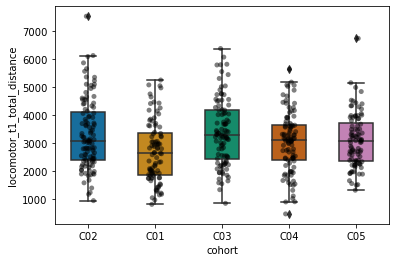

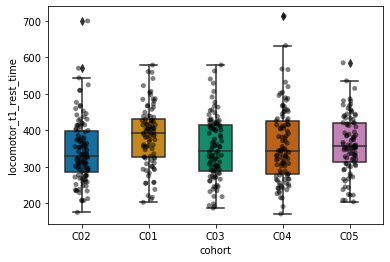

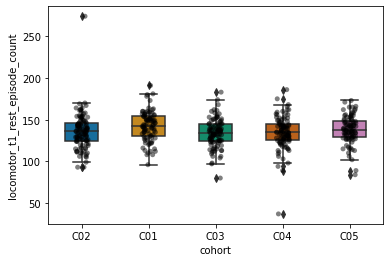

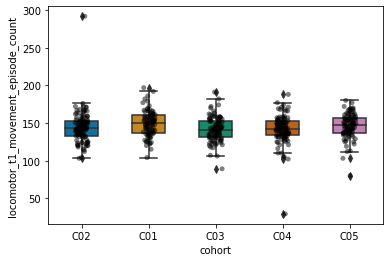

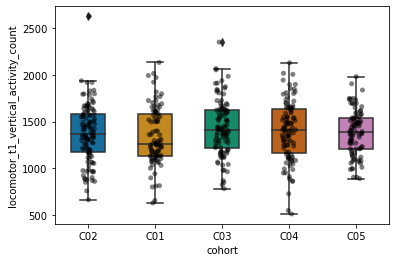

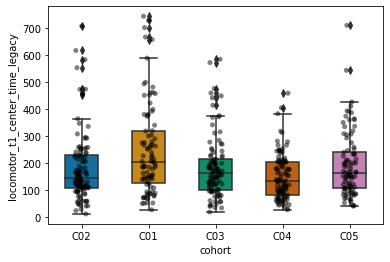

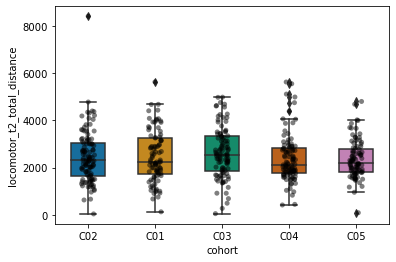

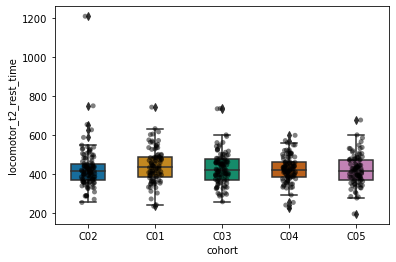

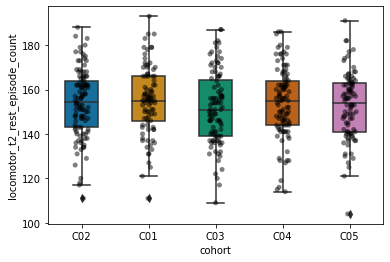

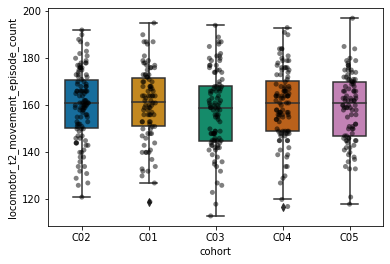

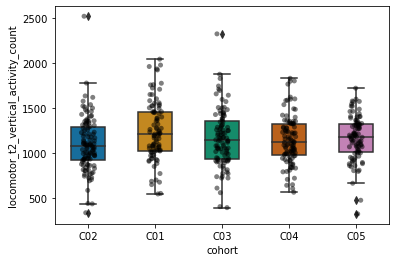

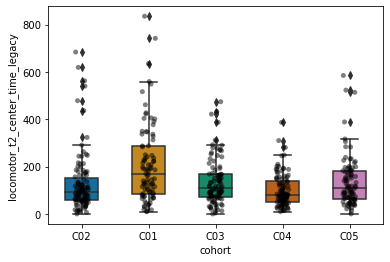

In [30]:
graph_columns = ['locomotor_t1_total_distance',
 'locomotor_t1_rest_time',
 'locomotor_t1_rest_episode_count',
 'locomotor_t1_movement_episode_count',
 'locomotor_t1_vertical_activity_count',
 'locomotor_t1_center_time_legacy',
 'locomotor_t2_total_distance',
 'locomotor_t2_rest_time',
 'locomotor_t2_rest_episode_count',
 'locomotor_t2_movement_episode_count',
 'locomotor_t2_vertical_activity_count',
 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='cohort', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='cohort',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

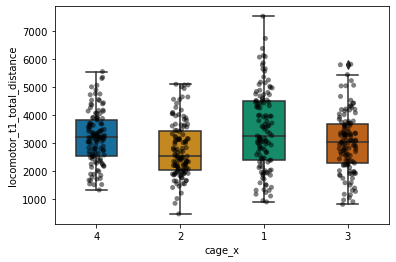

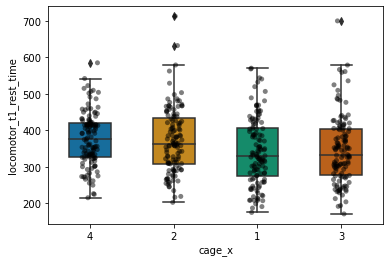

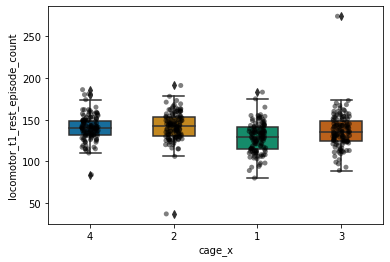

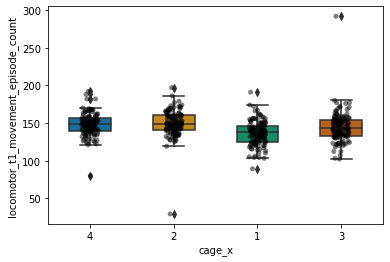

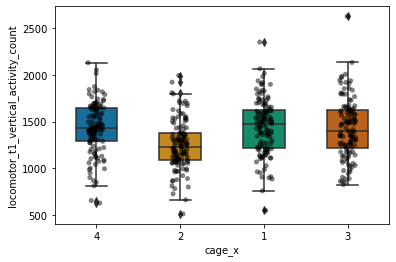

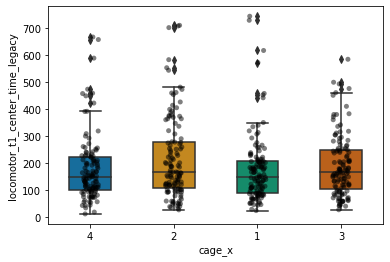

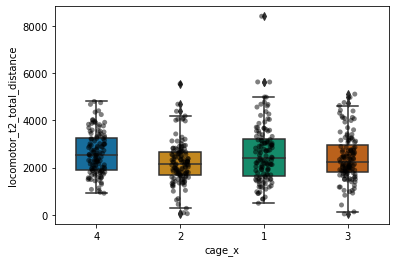

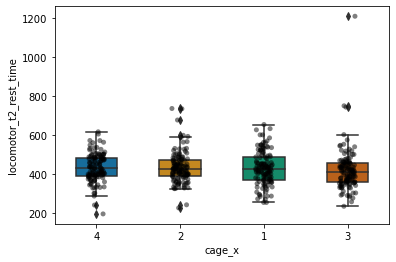

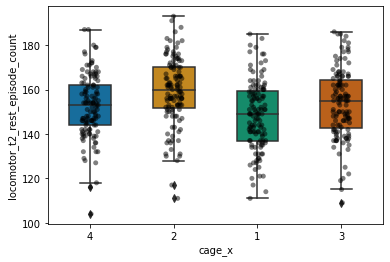

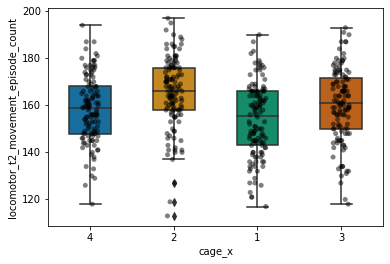

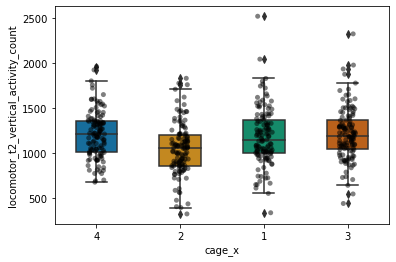

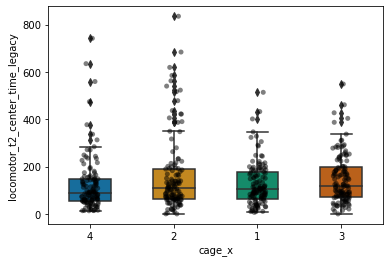

In [31]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='cage_x', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='cage_x',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

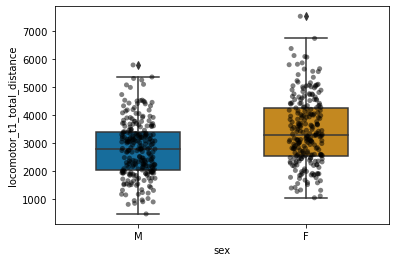

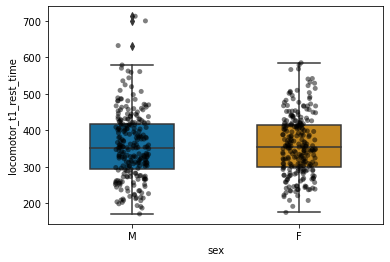

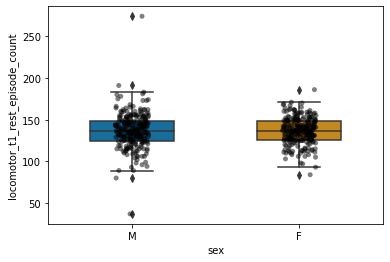

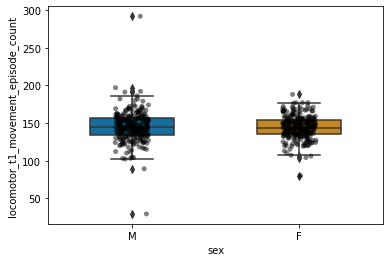

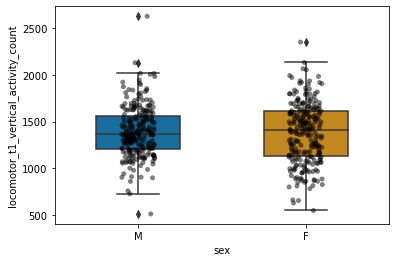

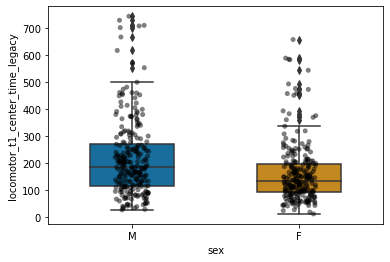

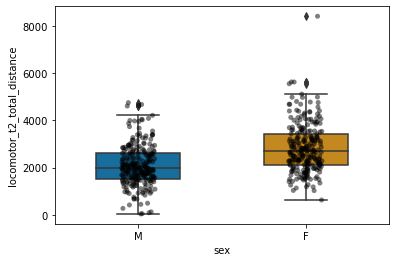

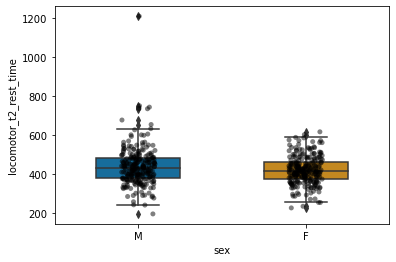

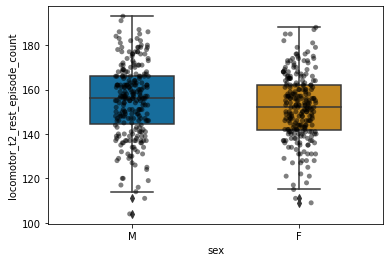

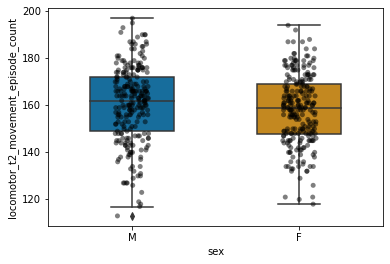

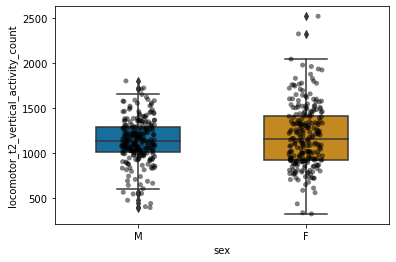

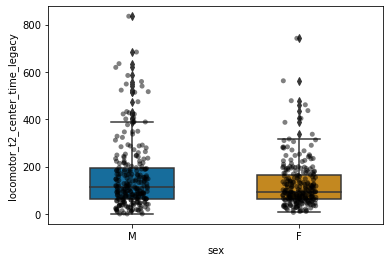

In [32]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='sex', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='sex',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

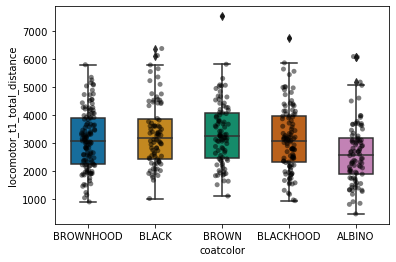

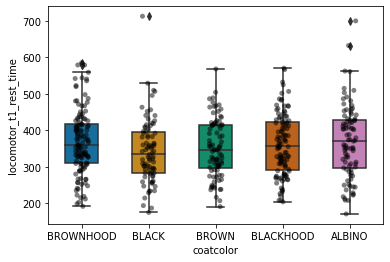

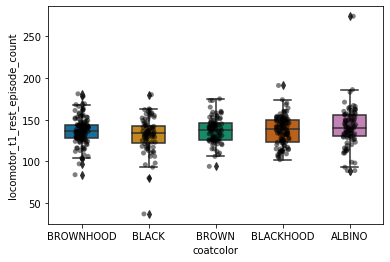

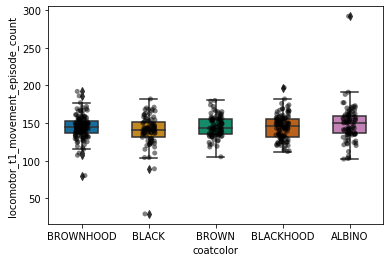

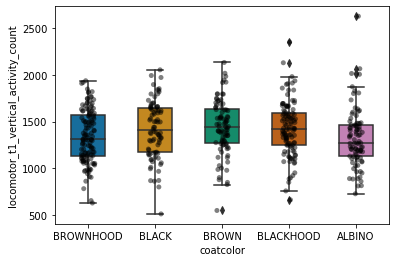

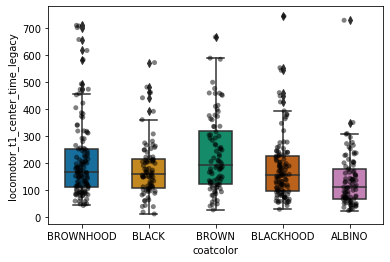

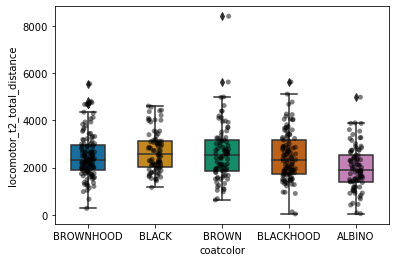

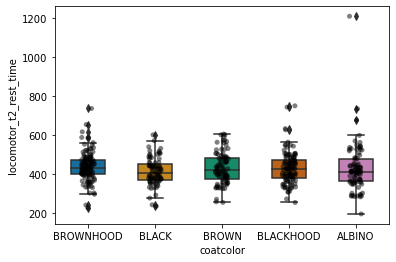

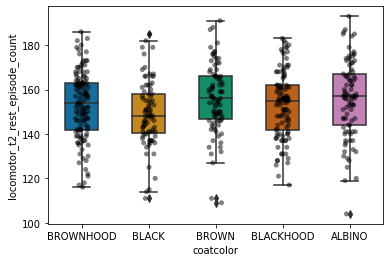

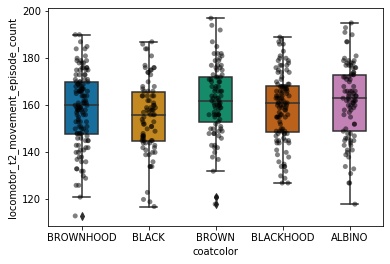

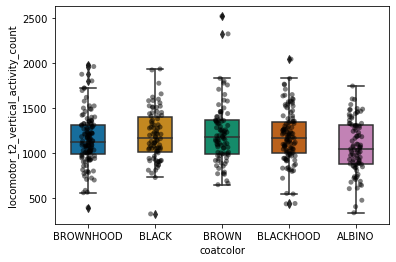

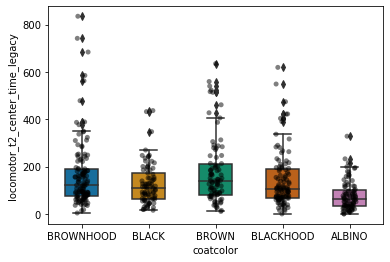

In [33]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='coatcolor', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='coatcolor',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()